In [187]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [188]:
df = pd.read_csv('2_experiment_results.csv', index_col=0)

/home/raf/.conda/envs/rlasp/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [189]:
df['arg_carcass'] = df.arg_carcass.fillna('ground_mdp')

# Table: target policy cumulative return

In [127]:
idxs = df.episode_id == df.arg_episodes
agg = df[idxs].groupby(['arg_blocks_world_size', 'arg_carcass', 'arg_learning_rate', 'arg_epsilon'])['target_policy_return_cumulative'] \
              .agg(lambda g: (g.mean(), g.std()))
tab = agg.reset_index().pivot(index=['arg_epsilon', 'arg_learning_rate'],
                        columns = ['arg_carcass', 'arg_blocks_world_size'],
                        values='target_policy_return_cumulative')
def highlight_max(s):
    is_positive = s.apply(lambda x: x[0] > 0)
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_positive & is_max]

def color_negative_red(val):
    color = 'red' if val[0] < 0 else 'black'
    return f'color: {color}'

st = tab.style.apply(highlight_max)\
         .applymap(color_negative_red)\
         .format(lambda args: f'{args[0]:.0f} ± {args[1]:.0f}')\

html = st.render()

with open('plots/target_policy_cumulative_return.html', 'w') as f:
    f.write(html)

st

# Plot: Compare carcass learning rates and epsilons

<ipython-input-179-e129d24c668d>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('plots/parameter_study.pdf', type='pdf')


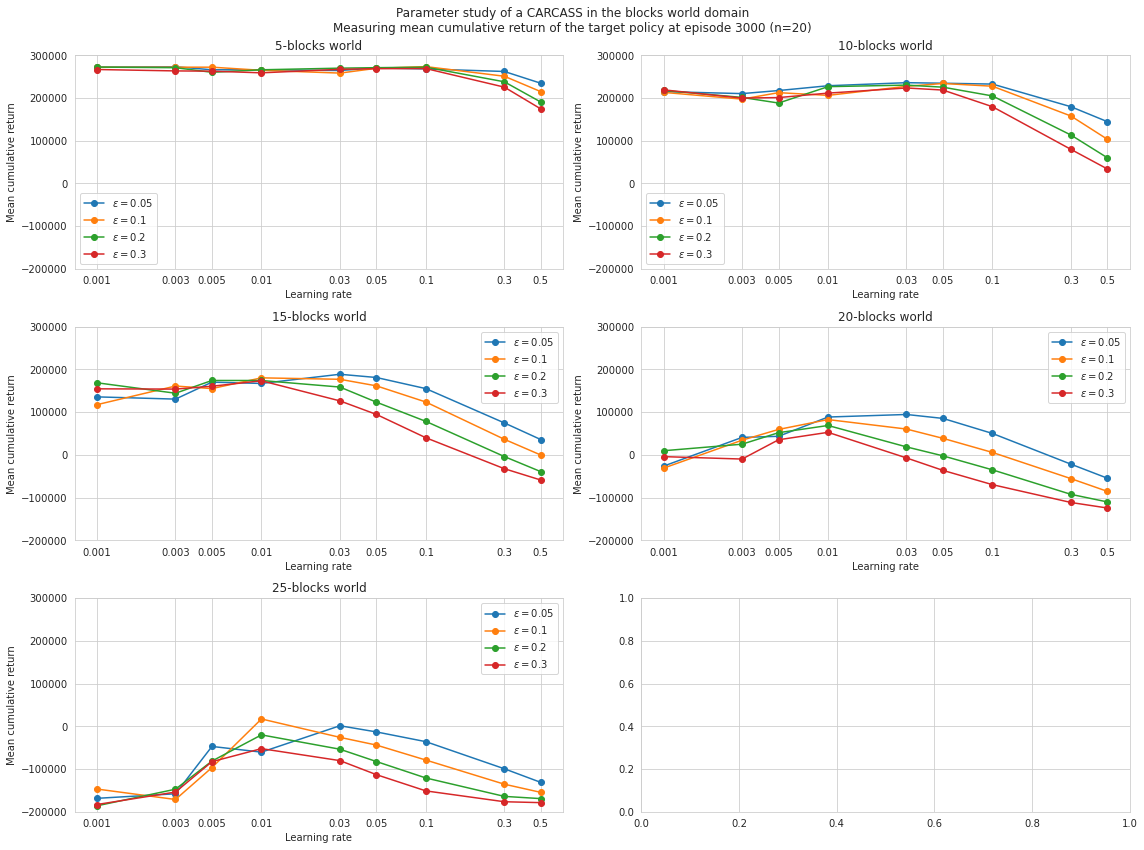

In [179]:
idxs = (df.episode_id == df.arg_episodes) & (df.arg_carcass == 'blocksworld_stackordered.lp')
learning_rates = list(sorted(df.arg_learning_rate.unique()))

fig, axs = plt.subplots(3, 2, figsize=(16, 12))

for (blocks_world_size, group_by_bws), ax in zip(df[idxs].groupby('arg_blocks_world_size'), axs.flatten()):
    for epsilon, group_by_epsilon in group_by_bws.groupby('arg_epsilon'):
        agg = group_by_epsilon.groupby('arg_learning_rate')['target_policy_return_cumulative'].mean()
        
        ax.set_xscale('log')
        ax.plot(agg, '-o', label=f'$\\epsilon={epsilon}$')
        ax.legend()
        
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Mean cumulative return')
        
        ax.set_xticks(learning_rates)
        ax.set_xticklabels(learning_rates)
        
        ax.set_title(f'{blocks_world_size}-blocks world')
        
        ax.set_ylim(-200000, 300000)

plt.suptitle('Parameter study of a CARCASS in the blocks world domain\nMeasuring mean cumulative return of the target policy at episode 3000 (n=20)')
plt.tight_layout()
plt.savefig('plots/parameter_study.pdf', type='pdf')

<ipython-input-191-ebbe8cfd4996>:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('plots/parameter_study_ground.pdf', type='pdf')


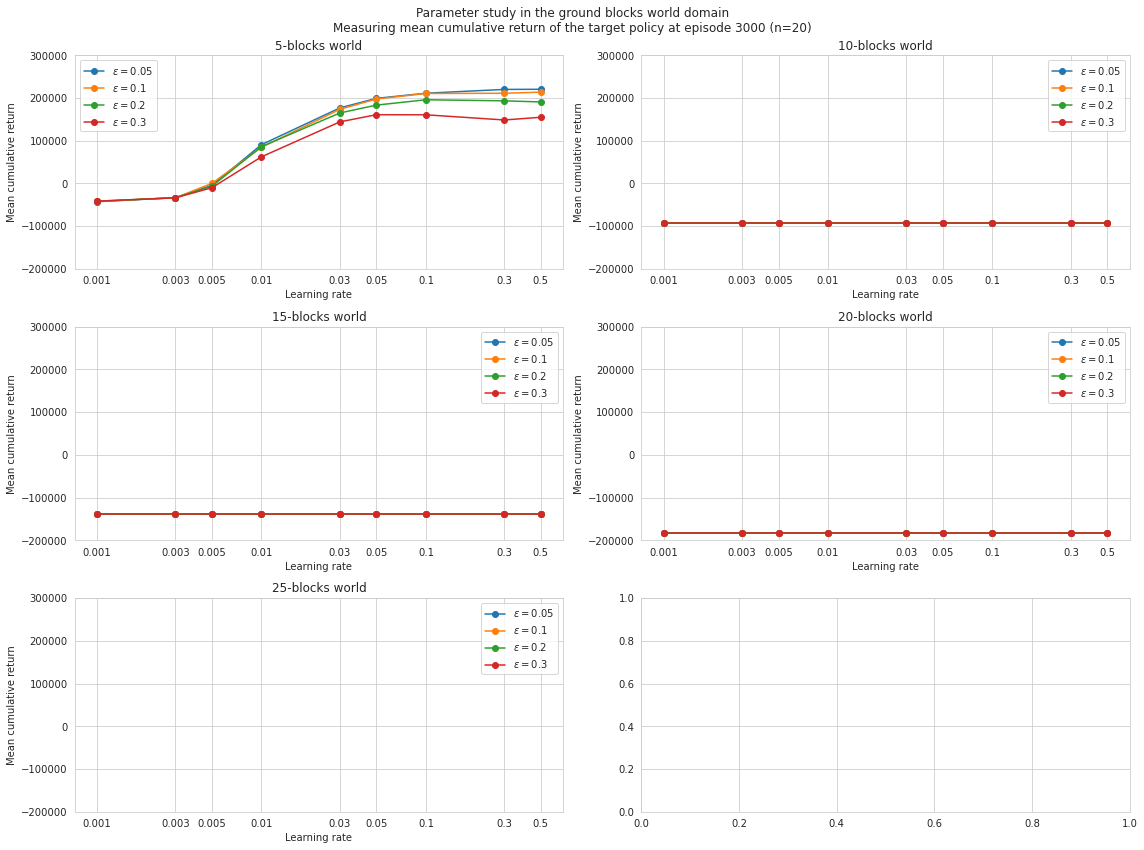

In [191]:
idxs = (df.episode_id == df.arg_episodes) & (df.arg_carcass == 'ground_mdp')
learning_rates = list(sorted(df.arg_learning_rate.unique()))

fig, axs = plt.subplots(3, 2, figsize=(16, 12))

for (blocks_world_size, group_by_bws), ax in zip(df[idxs].groupby('arg_blocks_world_size'), axs.flatten()):
    for epsilon, group_by_epsilon in group_by_bws.groupby('arg_epsilon'):
        agg = group_by_epsilon.groupby('arg_learning_rate')['target_policy_return_cumulative'].mean()
        
        ax.set_xscale('log')
        ax.plot(agg, '-o', label=f'$\\epsilon={epsilon}$')
        ax.legend()
        
        ax.set_xlabel('Learning rate')
        ax.set_ylabel('Mean cumulative return')
        
        ax.set_xticks(learning_rates)
        ax.set_xticklabels(learning_rates)
        
        ax.set_title(f'{blocks_world_size}-blocks world')
        
        ax.set_ylim(-200000, 300000)

plt.suptitle('Parameter study in the ground blocks world domain\nMeasuring mean cumulative return of the target policy at episode 3000 (n=20)')
plt.tight_layout()
plt.savefig('plots/parameter_study_ground.pdf', type='pdf')

# Plot: comparing performance with ground mdp

In [232]:
df.columns

Index(['arg_epsilon', 'arg_blocks_world_size', 'time_spent_in_target_episode',
       'arg_db_file', 'arg_carcass', 'behavior_policy_return',
       'target_policy_return', 'arg_learning_rate', 'arg_behavior_policy',
       'arg_mdp', 'arg_episodes', 'arg_plan_for_new_states',
       'arg_control_algorithm', 'time_spent_in_behavior_episode',
       'arg_planning_horizon', 'arg_max_episode_length',
       'arg_show_progress_bar', 'episode_id',
       'behavior_policy_return_cumulative', 'target_policy_return_cumulative',
       'mdp_label', 'algorithm_label', 'planner_label',
       'full_algorithm_label'],
      dtype='object')

<ipython-input-243-95622d0b33fc>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "type" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('plots/abstract_vs_ground_mdp.pdf', type='pdf')


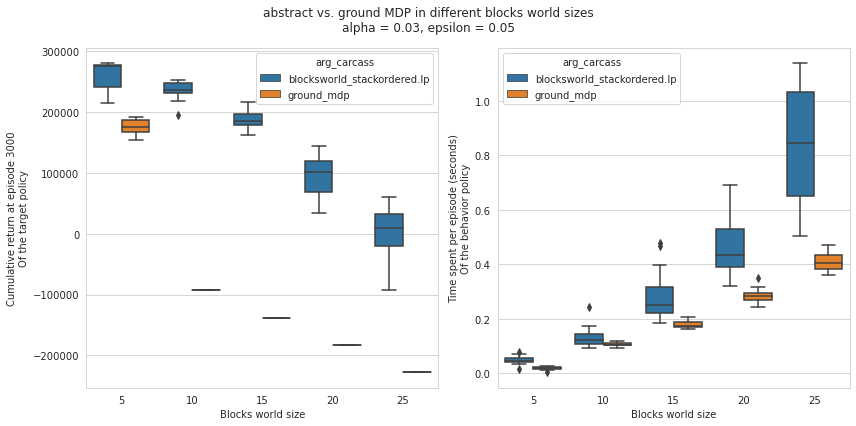

In [243]:
idxs = (df.episode_id == df.arg_episodes) & (df.arg_learning_rate == 0.03) & (df.arg_epsilon == 0.05)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='arg_blocks_world_size', y='target_policy_return_cumulative', hue='arg_carcass', data=df[idxs], ax=ax0)
ax0.set_xlabel('Blocks world size')
ax0.set_ylabel('Cumulative return at episode 3000\nOf the target policy')

sns.boxplot(x='arg_blocks_world_size', y='time_spent_in_behavior_episode', hue='arg_carcass', data=df[idxs], ax=ax1)
ax1.set_xlabel('Blocks world size')
ax1.set_ylabel('Time spent per episode (seconds)\nOf the behavior policy')

plt.suptitle(f'abstract vs. ground MDP in different blocks world sizes\nalpha = 0.03, epsilon = 0.05')
plt.tight_layout()

plt.savefig('plots/abstract_vs_ground_mdp.pdf', type='pdf')